In [1]:
import pandas as pd

In [2]:
bk=pd.read_csv('bank-full.csv')

In [3]:
bk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
bk.y=LabelEncoder().fit_transform(bk.y)

In [6]:
bk.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [7]:
bk.job=LabelEncoder().fit_transform(bk.job)
bk.loan=LabelEncoder().fit_transform(bk.loan)
bk.contact=LabelEncoder().fit_transform(bk.contact)
bk.month=LabelEncoder().fit_transform(bk.month)
bk.poutcome=LabelEncoder().fit_transform(bk.poutcome)
bk.education=LabelEncoder().fit_transform(bk.education)

In [8]:
bk=bk.drop('marital',axis=1)

In [9]:
bk=bk.drop('housing',axis=1)

In [10]:
bk=bk.drop('previous',axis=1)

In [11]:
bk=bk.drop('default',axis=1)

In [12]:
bk=bk.drop('pdays',axis=1)

In [13]:
bk

,age,job,education,balance,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,2,2143,0,2,5,8,261,1,3,0
1,44,9,1,29,0,2,5,8,151,1,3,0
2,33,2,1,2,1,2,5,8,76,1,3,0
3,47,1,3,1506,0,2,5,8,92,1,3,0
4,33,11,3,1,0,2,5,8,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,825,0,0,17,9,977,3,3,1
45207,71,5,0,1729,0,0,17,9,456,2,3,1
45208,72,5,1,5715,0,0,17,9,1127,5,2,1
45209,57,1,1,668,0,1,17,9,508,4,3,0


In [14]:
bk.isnull().sum()

age          0
job          0
education    0
balance      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
y            0
dtype: int64

In [15]:
# Slpitting data
from sklearn.linear_model import LogisticRegression

In [16]:
x=bk.iloc[:,0:10]
y=bk.iloc[:,11]

In [17]:
# Logistic Regreesion and fit the model
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\Rajneesh Sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# oredict for X dataset
y_pred=classifier.predict(x)

In [19]:
y_pred_df=pd.DataFrame({'actual':y,
                       'predicted_prob':classifier.predict(x)})

In [20]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix=confusion_matrix(y,y_pred)

In [23]:
confusion_matrix

array([[39212,   710],
       [ 4362,   927]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [26]:
# ROC CURVE

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score

Text(0, 0.5, 'true positive rate')

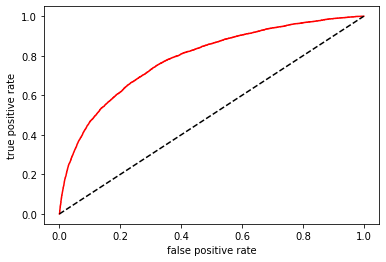

In [33]:
fpr,tpr,threshold=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [34]:
auc

0.5787423734933148